In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
sns.set(rc = {'figure.figsize':(15,5)})
sns.set(font_scale = 1.7)

In [5]:
tweets = pd.read_csv("/home/axelmpm/AXEL/Facultad/2020_1C_Organizacion de Datos/Dataset/nlp-getting-started/train.csv")

In [6]:
tweets.set_index("id", inplace = True)
tweets['length'] = tweets.apply(lambda row : len(row['text']), axis = 1)
tweets.sort_values('length', ascending = False, inplace = True)

In [7]:
groupedLengths = tweets.groupby(['length','target']).count().reset_index().rename(
            columns = {'keyword': 'keywords amount','location': 'tweet location amount','text': 'tweets amount'})

In [8]:
maxLength = groupedLengths.max()['length']
minLength = groupedLengths.min()['length']
meanLength = int(groupedLengths.mean()['length'])

In [9]:
maxLength

157

In [10]:
minLength

7

In [11]:
meanLength

81

In [12]:
def labelVerbose(x):
    if x == 1:
        return "Desastre"
    else:
        return "No Desastre"

In [13]:
tweets['target verbose'] = tweets['target'].apply(lambda x : labelVerbose(x))

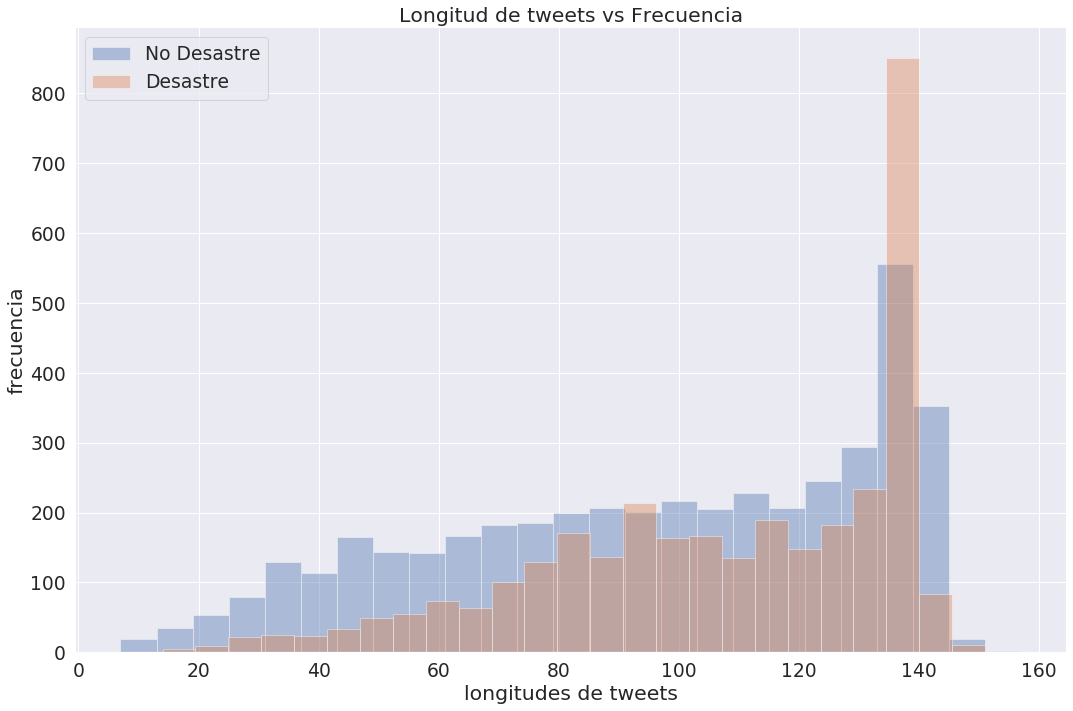

In [14]:
g = sns.FacetGrid(tweets, hue = "target verbose", height = 10, aspect = 1.5)
v = g.map(sns.distplot, "length", kde = False, bins = 25 )
v.set(xlabel = 'longitudes de tweets', ylabel = 'frecuencia', title = 'Longitud de tweets vs Frecuencia')

for ax in v.axes.ravel():
    ax.legend()

In [39]:
from matplotlib.colors import ListedColormap

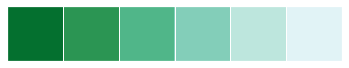

In [47]:
current_palette = sns.color_palette("BuGn_r")
my_cmap = ListedColormap(current_palette)
sns.palplot(current_palette)

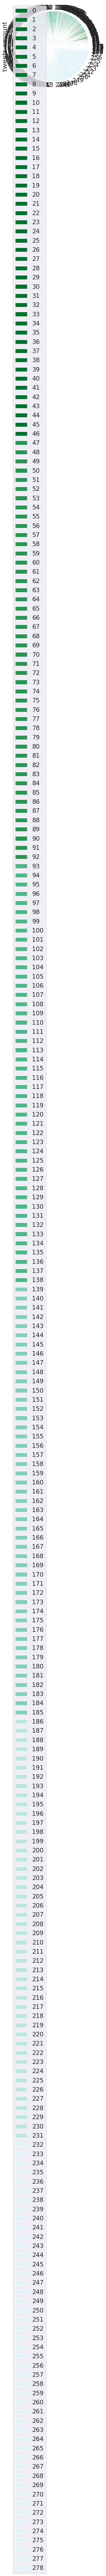

In [48]:
groupedLengths.plot(x = 'length', y = 'tweets amount', kind = 'pie', colormap = my_cmap)